In [35]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [100]:
ticker_symbol = "HG=F"
init_date = "2016-12-30"
finish_date = "2024-10-24"

ticker = yf.Ticker(ticker_symbol)
df = ticker.history(start=init_date, end=finish_date, interval="1d")
df.reset_index(inplace=True)
df["Date"] = df["Date"].dt.strftime("%Y-%m-%d")
df["Date"] = pd.to_datetime(df["Date"])

In [101]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2016-12-30,2.4925,2.5065,2.4925,2.4975,507,0.0,0.0
1,2017-01-03,2.5270,2.5275,2.4800,2.4810,590,0.0,0.0
2,2017-01-04,2.4970,2.5495,2.4970,2.5480,742,0.0,0.0
3,2017-01-05,2.5540,2.5725,2.5270,2.5295,306,0.0,0.0
4,2017-01-06,2.5175,2.5380,2.5050,2.5380,340,0.0,0.0


In [102]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1966,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.0,1966.0
mean,2020-11-27 17:14:13.306205440,3.428764,3.451489,3.405361,3.429826,1721.982706,0.0,0.0
min,2016-12-30 00:00:00,2.113500,2.125500,2.059500,2.119500,0.000000,0.0,0.0
25%,2018-12-14 18:00:00,2.756125,2.770625,2.736750,2.755500,374.000000,0.0,0.0
50%,2020-11-26 00:00:00,3.286000,3.296250,3.259750,3.293250,522.000000,0.0,0.0
75%,2022-11-08 18:00:00,4.065000,4.103375,4.030750,4.071875,771.750000,0.0,0.0
max,2024-10-23 00:00:00,5.192000,5.198500,5.057500,5.119000,77484.000000,0.0,0.0
std,NaN,0.708304,0.716011,0.700919,0.708626,6768.884040,0.0,0.0


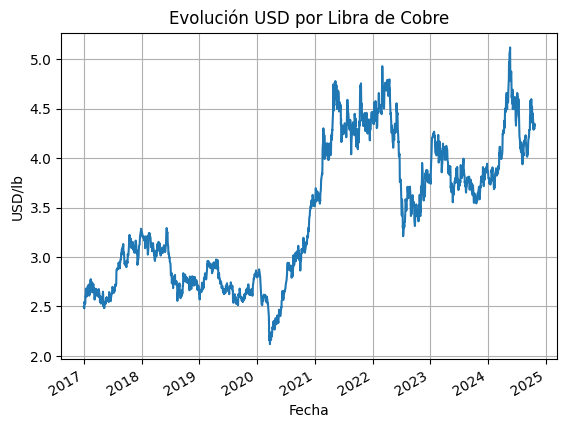

In [103]:
df.plot(
    x="Date",
    y="Close",
    title="Evolución USD por Libra de Cobre",
    xlabel="Fecha",
    ylabel="USD/lb",
    grid=True,
    legend=False,
    #ylim=(0,1200)
)
plt.show()

In [104]:
df["copper_diff_1"] = np.log(df["Close"]) - np.log(df["Close"].shift())

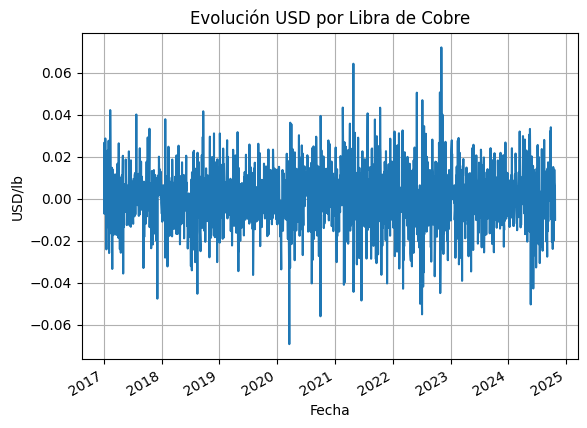

In [105]:
df.plot(
    x="Date",
    y="copper_diff_1",
    title="Evolución USD por Libra de Cobre",
    xlabel="Fecha",
    ylabel="USD/lb",
    grid=True,
    legend=False,
    #ylim=(0,1200)
)
plt.show()

In [106]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,copper_diff_1
count,1966,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.0,1966.0,1965.000000
mean,2020-11-27 17:14:13.306205440,3.428764,3.451489,3.405361,3.429826,1721.982706,0.0,0.0,0.000277
min,2016-12-30 00:00:00,2.113500,2.125500,2.059500,2.119500,0.000000,0.0,0.0,-0.069286
25%,2018-12-14 18:00:00,2.756125,2.770625,2.736750,2.755500,374.000000,0.0,0.0,-0.007764
50%,2020-11-26 00:00:00,3.286000,3.296250,3.259750,3.293250,522.000000,0.0,0.0,0.000375
75%,2022-11-08 18:00:00,4.065000,4.103375,4.030750,4.071875,771.750000,0.0,0.0,0.008869
max,2024-10-23 00:00:00,5.192000,5.198500,5.057500,5.119000,77484.000000,0.0,0.0,0.071988
std,NaN,0.708304,0.716011,0.700919,0.708626,6768.884040,0.0,0.0,0.013995


In [109]:
df_er = pd.read_csv("../data/raw/exchangeRateIATA.csv", sep=";")
df_er["dates"] = pd.to_datetime(df_er["dates"])
df_er["usd_diff_1"] = np.log(df_er["iata"]) - np.log(df_er["iata"].shift())

In [110]:
df_er.head()

,dates,iata,usd_diff_1
0,2017-01-01,672,NaN
1,2017-01-02,672,0.000000
2,2017-01-03,670,-0.002981
3,2017-01-04,675,0.007435
4,2017-01-05,674,-0.001483


In [113]:
df_er.merge(df[["Date", "Close","copper_diff_1"]], how="left", left_on="dates", right_on="Date")

,dates,iata,usd_diff_1,Date,Close,copper_diff_1
0,2017-01-01,672,NaN,NaT,NaN,NaN
1,2017-01-02,672,0.000000,NaT,NaN,NaN
2,2017-01-03,670,-0.002981,2017-01-03,2.4810,-0.006629
3,2017-01-04,675,0.007435,2017-01-04,2.5480,0.026647
4,2017-01-05,674,-0.001483,2017-01-05,2.5295,-0.007287
...,...,...,...,...,...,...
2849,2024-10-20,942,0.000000,NaT,NaN,NaN
2850,2024-10-21,942,0.000000,2024-10-21,4.3230,-0.005306
2851,2024-10-22,954,0.012658,2024-10-22,4.3480,0.005766
2852,2024-10-23,954,0.000000,2024-10-23,4.3045,-0.010055


In [70]:
ticker_symbol = "CLP=X"
init_date = "2017-01-01"
finish_date = "2024-10-24"

ticker = yf.Ticker(ticker_symbol)
df = ticker.history(start=init_date, end=finish_date, interval="1d")  # data for the last year
#df.reset_index(inplace=True) 

In [72]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.0,2035.0,2035.0
mean,768.940148,774.578619,764.380152,769.918192,0.0,0.0,0.0
std,106.680534,106.630317,105.307317,105.417157,0.0,0.0,0.0
min,583.489990,591.200012,580.349976,581.099976,0.0,0.0,0.0
25%,670.100006,675.750000,667.065002,672.705017,0.0,0.0,0.0
50%,775.489990,779.739990,770.799988,775.349976,0.0,0.0,0.0
75%,849.955017,856.010010,843.119995,849.904999,0.0,0.0,0.0
max,1050.260010,1050.260010,1050.260010,1050.260010,0.0,0.0,0.0


In [77]:
ticker.get_info()

{'maxAge': 86400,
 'priceHint': 4,
 'previousClose': 1012.0,
 'open': 1013.58,
 'dayLow': 1004.88,
 'dayHigh': 1017.28,
 'regularMarketPreviousClose': 1012.0,
 'regularMarketOpen': 1013.58,
 'regularMarketDayLow': 1004.88,
 'regularMarketDayHigh': 1017.28,
 'bid': 1005.78,
 'ask': 1009.03,
 'fiftyTwoWeekLow': 884.3811,
 'fiftyTwoWeekHigh': 1017.28,
 'fiftyDayAverage': 982.6784,
 'twoHundredDayAverage': 944.1974,
 'currency': 'CLP',
 'exchange': 'CCY',
 'quoteType': 'CURRENCY',
 'symbol': 'CLP=X',
 'underlyingSymbol': 'CLP=X',
 'shortName': 'USD/CLP',
 'longName': 'USD/CLP',
 'firstTradeDateEpochUtc': 1070236800,
 'timeZoneFullName': 'Europe/London',
 'timeZoneShortName': 'GMT',
 'uuid': 'a925783d-0cec-315d-b4a6-799b86599344',
 'messageBoardId': 'finmb_CLP_X',
 'trailingPegRatio': None}

In [79]:
ticker.analyst_price_targets

{}

In [80]:
ticker.get_actions()

,Dividends,Stock Splits
Date,,


In [81]:
ticker.get_analyst_price_targets()

{}

In [82]:
ticker.get_financials()

""


In [83]:
ticker.get_news()

[]